# `Predicting Salary with Position Level`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Importing the Dataset

In [3]:
df = pd.read_csv("./2013_Salaries__Pennsylvania_State_System_of_Higher_Education.csv")

In [4]:
df.head()

,index,Name,Base Pay,University or Office,Position
0,0,"Driscoll, Michael Allan",$275000,Indiana,University President
1,1,"Weisenstein, Greg R",$241935,West Chester,University President
2,2,"Welsh, Marcia L",$230000,East Stroudsburg,University President
3,3,"Norton, Cheryl J.",$225000,Slippery Rock,University President
4,4,"Wollman, Julie E.",$225000,Edinboro,University President


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 12632 non-null  int64 
 1   Name                  12632 non-null  object
 2   Base Pay              12632 non-null  object
 3   University or Office  12632 non-null  object
 4   Position              12632 non-null  object
dtypes: int64(1), object(4)
memory usage: 493.6+ KB


### Column Datatypes

In [6]:
df.dtypes

index                    int64
Name                    object
Base Pay                object
University or Office    object
Position                object
dtype: object

### Checking for null values

In [7]:
df.isnull().sum()

index                   0
Name                    0
Base Pay                0
University or Office    0
Position                0
dtype: int64

## 2) Data Preprocessing

### Unique University or Office Values

In [8]:
df["University or Office"].unique()

array(['Indiana', 'West Chester', 'East Stroudsburg', 'Slippery Rock',
       'Edinboro', 'Millersville', 'Lock Haven', 'Clarion', 'Kutztown',
       'Bloomsburg', 'Shippensburg', 'Cheyney', 'California',
       'Office of the Chancellor', 'Mansfield'], dtype=object)

### Converting Base Pay to numeric (remove '$')

In [9]:
df["Base Pay"] = df["Base Pay"].str.lstrip("$")

df["Base Pay"] = df["Base Pay"].astype(float)

### Simplifying Position

In [10]:
df['Position'][df.Position.str.lower().str.contains('assistant')] = 'Assistant'
df['Position'][df.Position.str.lower().str.contains('professor')] = 'Professor'
df['Position'][df.Position.str.lower().str.contains('instructor')] = 'Instructor'
df['Position'][df.Position.str.lower().str.contains('custodial')] = 'Custodial'
df['Position'][df.Position.str.lower().str.contains('clerk')] = 'Clerk'
df['Position'][df.Position.str.lower().str.contains('maintenance')] = 'Maintenance'
df['Position'][df.Position.str.lower().str.contains('operator')] = 'Operator'
df['Position'][df.Position.str.lower().str.contains('technician')] = 'Technician'
df['Position'][df.Position.str.lower().str.contains('officer')] = 'Officer'
df['Position'][df.Position.str.lower().str.contains('supervisor')] = 'Supervisor'
df['Position'][df.Position.str.lower().str.contains('specialist')] = 'Specialist'
df['Position'][df.Position.str.lower().str.contains('nurse')] = 'Nurse'
df['Position'][df.Position.str.lower().str.contains('analyst')] = 'Analyst'
df['Position'][df.Position.str.lower().str.contains('coach')] = 'Coach'
df['Position'][df.Position.str.lower().str.contains('developer')] = 'Developer'
df['Position'][df.Position.str.lower().str.contains('secretary')] = 'Secretary'
df['Position'][df.Position.str.lower().str.contains('mechanic')] = 'Mechanic'

C:\Users\Admin\AppData\Local\Temp\ipykernel_16908\1981941194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'][df.Position.str.lower().str.contains('assistant')] = 'Assistant'
C:\Users\Admin\AppData\Local\Temp\ipykernel_16908\1981941194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'][df.Position.str.lower().str.contains('professor')] = 'Professor'
C:\Users\Admin\AppData\Local\Temp\ipykernel_16908\1981941194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

### Remvoing outliers (less than 50 occurences)

In [11]:
counts = df["Position"].value_counts()

df = df[df["Position"].isin(counts[counts > 50].index)]

### Removing "Name" column

In [12]:
df = df.drop("Name", axis=1)

### Removing "index" column

In [13]:
df = df.drop("index", axis=1)

## 3) EDA

<AxesSubplot: xlabel='University or Office', ylabel='count'>

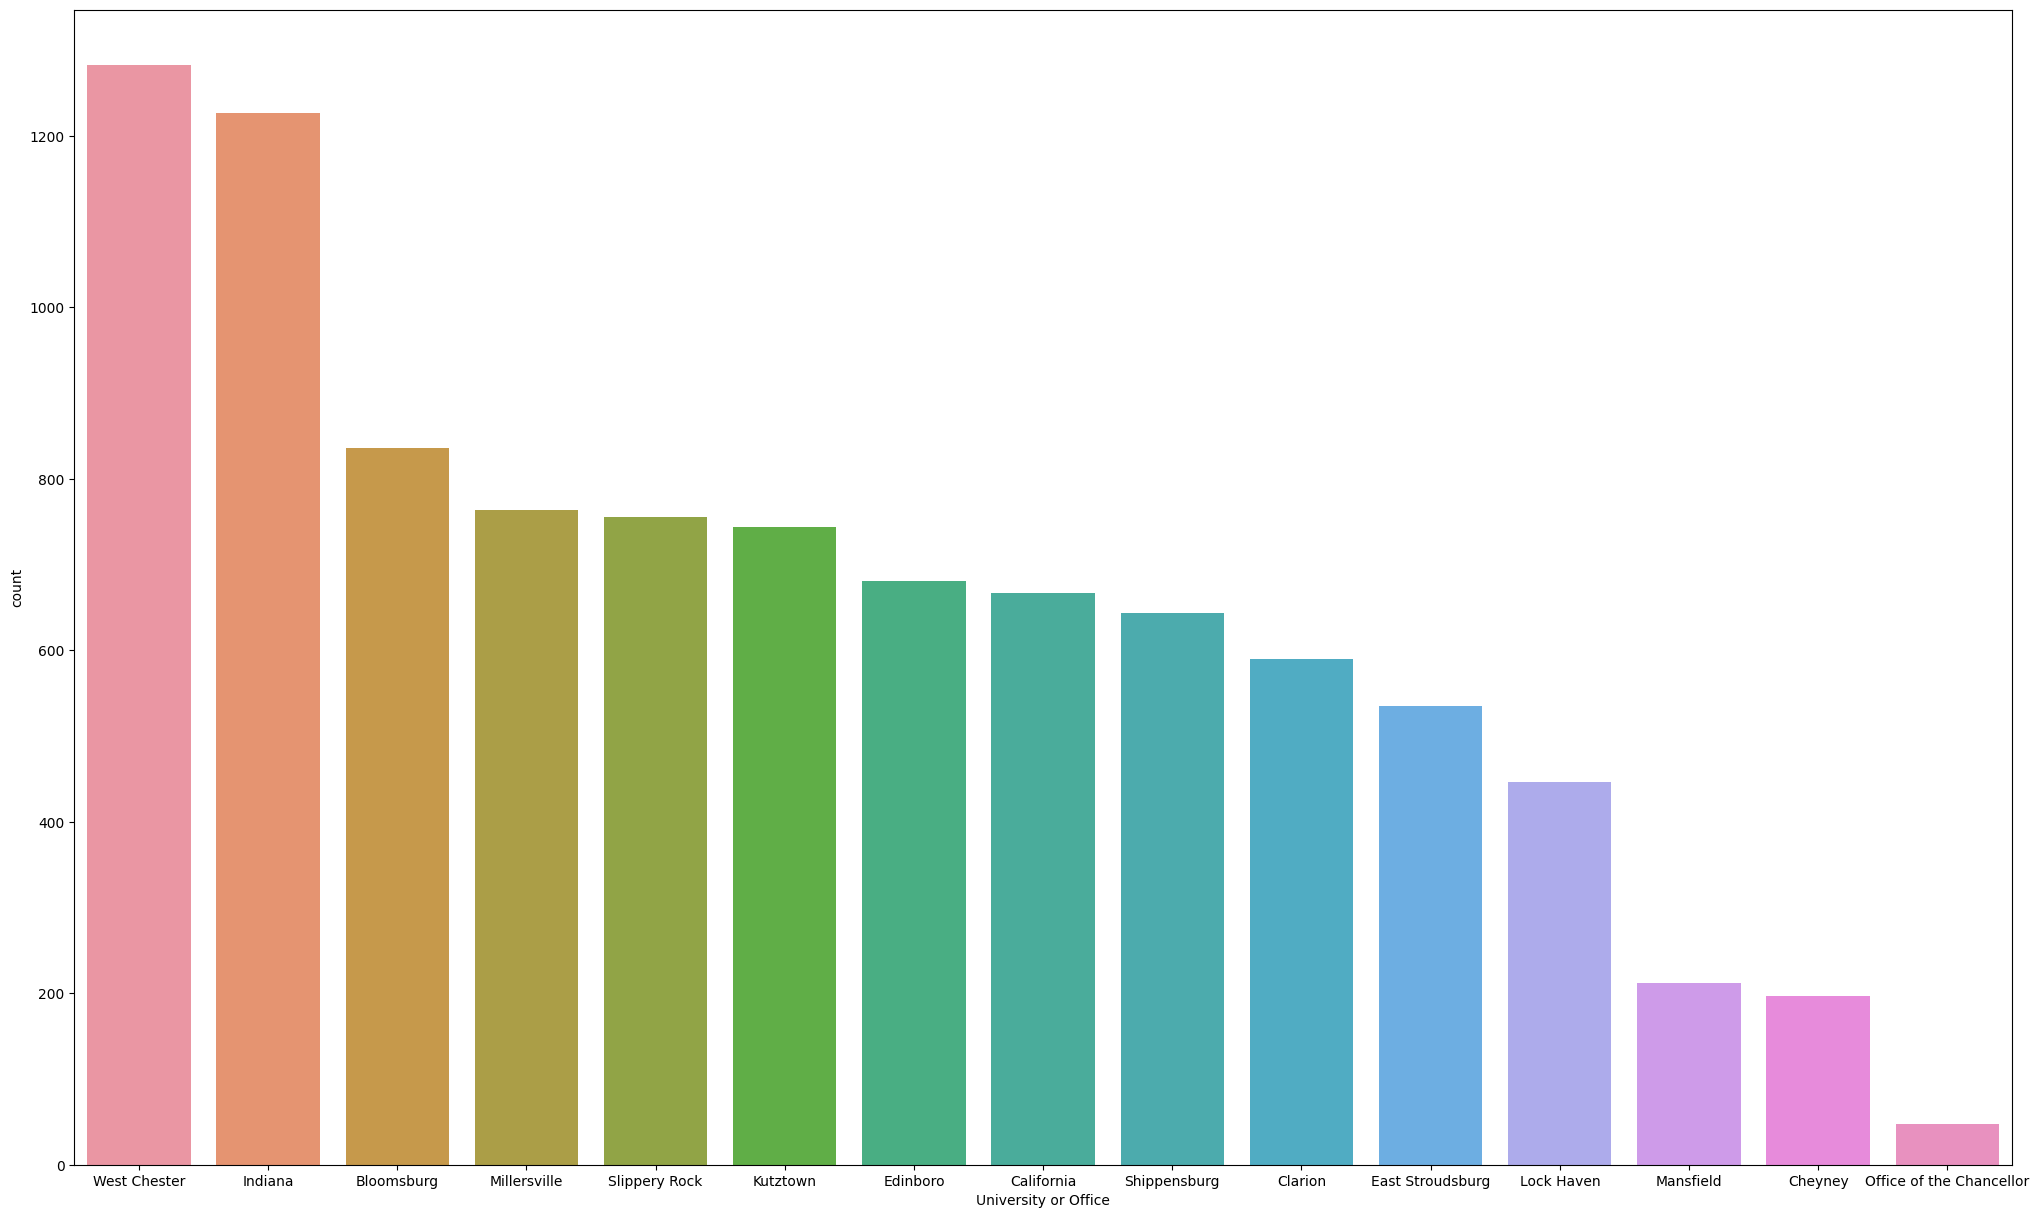

In [14]:
plt.figure(figsize=(25, 15))

sns.countplot(x="University or Office", data=df,
              order=df["University or Office"].value_counts().index)

<AxesSubplot: xlabel='Base Pay', ylabel='Count'>

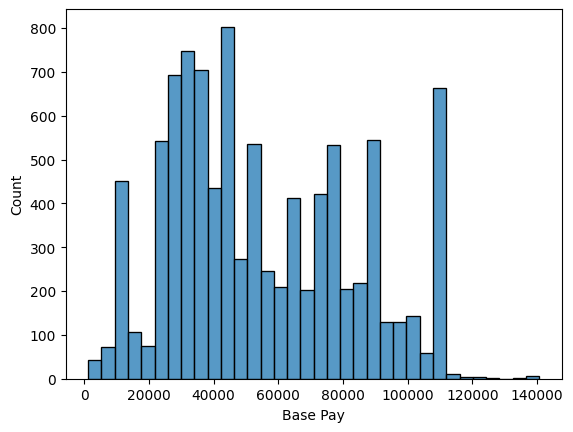

In [15]:
sns.histplot(df["Base Pay"])

### Converting to dummy variables
##### No drop_first=True because we want to keep all the columns

In [16]:
university = pd.get_dummies(df["University or Office"])
position = pd.get_dummies(df["Position"])

df = pd.concat([df, university, position], axis=1)

df = df.drop(["University or Office", "Position"], axis=1)

## 4) Building the Model

### Splitting into X and y

In [17]:
X = df.drop("Base Pay", axis=1)
y = df["Base Pay"]

### Splitting into train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [19]:
X_train.shape, X_test.shape

((7701, 32), (1926, 32))

In [20]:
y_train.shape, y_test.shape

((7701,), (1926,))

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the model

In [22]:
model.fit(X_train, y_train)

LinearRegression()

## 5) Evaluating the Model

In [23]:
model_score_train = model.score(X_train, y_train)
model_score_train

0.763484089573561

In [24]:
model_score_test = model.score(X_test, y_test)
model_score_test

0.748534805748299

In [25]:
predictions = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

202468534.86825025

In [27]:
rmse = np.sqrt(mse)
rmse

14229.143855771867

## 6) Using Deep Learning Model

In [28]:
X = df.drop("Base Pay", axis=1)
y = df["Base Pay"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

### Scaling Data

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train.shape, X_test.shape

((7701, 32), (1926, 32))

In [31]:
y_train.shape, y_test.shape

((7701,), (1926,))

### Model Architecture

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [33]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=400
          )

Epoch 1/400
61/61 [==============================] - 1s 4ms/step - loss: 3788030720.0000 - val_loss: 3867205376.0000
Epoch 2/400
61/61 [==============================] - 0s 2ms/step - loss: 3769362944.0000 - val_loss: 3799770112.0000
Epoch 3/400
61/61 [==============================] - 0s 2ms/step - loss: 3488160256.0000 - val_loss: 3107747072.0000
Epoch 4/400
61/61 [==============================] - 0s 2ms/step - loss: 2142313728.0000 - val_loss: 1156828928.0000
Epoch 5/400
61/61 [==============================] - 0s 2ms/step - loss: 722793024.0000 - val_loss: 563980352.0000
Epoch 6/400
61/61 [==============================] - 0s 2ms/step - loss: 493110816.0000 - val_loss: 442853536.0000
Epoch 7/400
61/61 [==============================] - 0s 2ms/step - loss: 391165792.0000 - val_loss: 357988288.0000
Epoch 8/400
61/61 [==============================] - 0s 3ms/step - loss: 317047616.0000 - val_loss: 295228608.0000
Epoch 9/400
61/61 [==============================] - 0s 2ms/step - loss:

<AxesSubplot: >

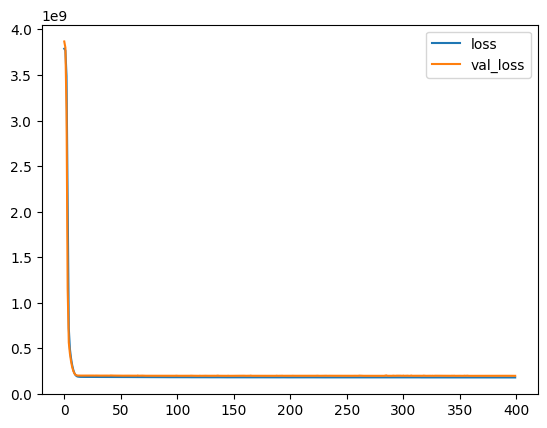

In [34]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)
evs = explained_variance_score(y_test, predictions)
print("Explained Variance Score:", evs)

61/61 [==============================] - 0s 2ms/step
RMSE: 14116.718489934421
Explained Variance Score: 0.752495490868217
